In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')
import pandas as pd
import numpy as np

adult = pd.read_csv("adult_with_pii.csv")
def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)
def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

差分隐私变体

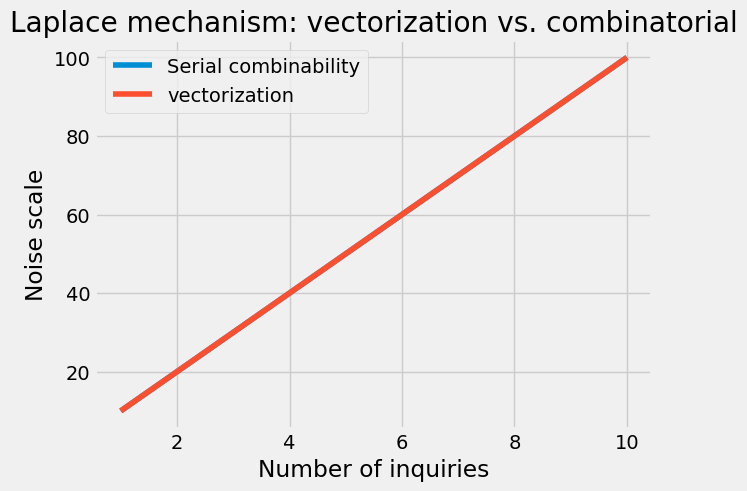

In [5]:
ks = np.linspace(1, 10, 20)
epsilon = .1

# 每个问询的L1敏感度：1
# 每个问询的噪声尺度：1/ε
# 问询次数：k
noises_seq = [k*(1/epsilon) for k in ks]
plt.plot(ks, noises_seq, label='Serial combinability')

# 问询次数：1
# 每个问询的L1敏感度：k
# 每个问询的噪声尺度：k/ε
noises_l1 = [1*(k/epsilon) for k in ks]
plt.plot(ks, noises_l1, label='vectorization')
plt.title('Laplace mechanism: vectorization vs. combinatorial')
plt.xlabel('Number of inquiries')
plt.ylabel('Noise scale')
plt.legend();

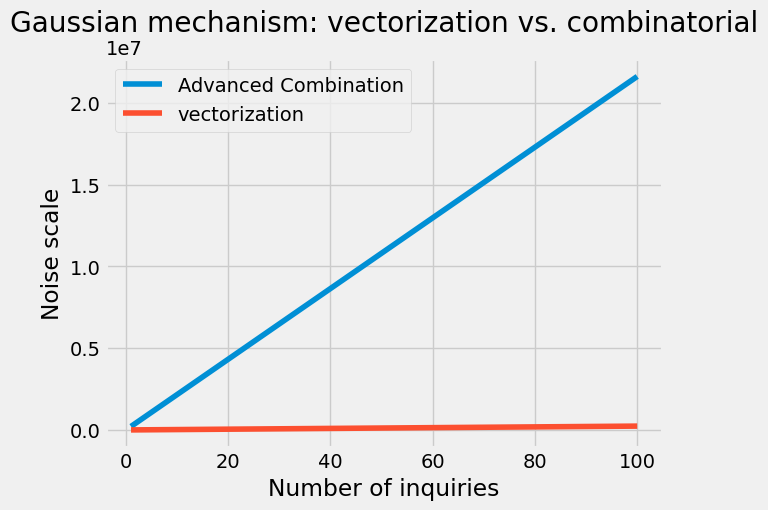

In [6]:
ks = np.linspace(1, 100, 20)
epsilon = .1
delta = 1e-5

# 每个问询的L2敏感度：1
# 问询次数：k
noises_seq = [16*k*np.log(1.25/delta)*np.log(1/delta)/(epsilon**2) for k in ks]
plt.plot(ks, noises_seq, label='Advanced Combination')

# 问询次数：1
# 每个问询的L2敏感度：sqrt(k)
noises_l1 = [2*k*np.log(1.25/delta)/(epsilon**2) for k in ks]
plt.title('Gaussian mechanism: vectorization vs. combinatorial')
plt.xlabel('Number of inquiries')
plt.ylabel('Noise scale')
plt.plot(ks, noises_l1, label='vectorization')
plt.legend();

瑞丽差分隐私 - Rényi Differential Privacy，RDP

In [7]:
def gaussian_mech_RDP_vec(vec, sensitivity, alpha, epsilon_bar):
    sigma = np.sqrt((sensitivity**2 * alpha) / (2 * epsilon_bar))
    return [v + np.random.normal(loc=0, scale=sigma) for v in vec]

零集中差分隐私 - Zero-concentrated Differential Privacy，zCDP

In [8]:
def gaussian_mech_zCDP_vec(vec, sensitivity, rho):
    sigma = np.sqrt((sensitivity**2) / (2 * rho))
    return [v + np.random.normal(loc=0, scale=sigma) for v in vec]

不同差分隐私变体的组合性:
使用高斯机制实现差分隐私（特别是高维向量）
问询算法多次（如成百上千次）使用差分隐私机制

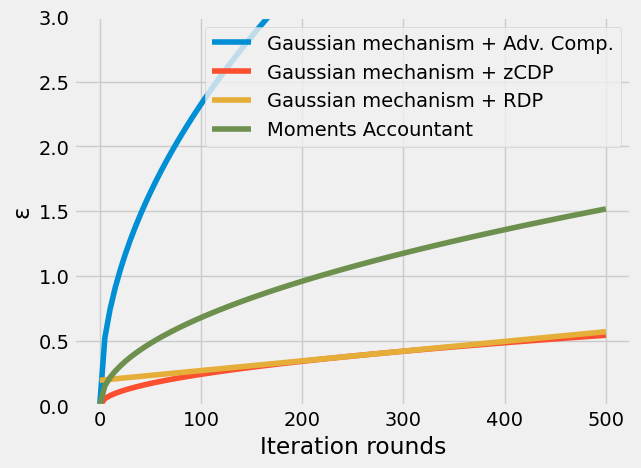

In [14]:
sigma = 200.0
delta = 1e-5
lap_eps = 2*sigma**2
xs = np.linspace(0, 500, 100)

gauss_eps = np.sqrt(2 * np.log(1.25/delta) / sigma**2)
ys_gauss = [x * np.sqrt(2 * np.log(1.25/delta) / sigma**2) for x in xs]

ys_gauss_adv = [2 * gauss_eps * np.sqrt(2 * x * np.log(1/delta)) for x in xs]

rho = 1/(2*sigma**2)
ys_gauss_zcdp = [(x*rho) + 2*np.sqrt((x*rho) * np.log(1/delta)) for x in xs]

alpha = 60
rdp_eps = alpha / (2*sigma**2)

ys_gauss_rdp = [(x*rdp_eps) + np.log(1/delta)/(alpha-1) for x in xs]

ys_moments = [4*np.sqrt(x*np.log(1/delta))/sigma for x in xs]

plt.plot(xs, ys_gauss_adv, label="Gaussian mechanism + Adv. Comp.")
plt.plot(xs, ys_gauss_zcdp, label="Gaussian mechanism + zCDP")
plt.plot(xs, ys_gauss_rdp, label="Gaussian mechanism + RDP")
plt.plot(xs, ys_moments, label="Moments Accountant")

plt.xlabel('Iteration rounds')
plt.ylabel('ε')
plt.ylim(0, 3.0)


plt.legend()
plt.show();